# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

> **Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify analyses before drawing scientific conclusions.

## Overview

This dandiset contains data from a study investigating how distinct dopamine projections from the dorsal raphe nucleus (DRN) in the mouse brain modulate aspects of social behavior and affective state, particularly those related to loneliness and motivation. The research examines DRN dopamine neuron projections to different brain regions (BNST, CeA, BLP) using approaches including optogenetics, calcium imaging, ex vivo and in vivo electrophysiology, and behavioral tracking.

**Dandiset URL:** [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

### This notebook covers:

1. Accessing and exploring the Dandiset's metadata
2. Examining the structure of NWB files in the Dandiset
3. Analyzing the contents of an example intracellular electrophysiology file
4. Visualizing stimulus and response data from patch-clamp recordings
5. Exploring metadata and protocols in the Dandiset
6. Tips for working with multiple files and extending analyses

## Required Packages

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice

## Dandiset Information

Let's start by retrieving basic information about the Dandiset using the DANDI Python API.

In [2]:
# Create a DANDI API client and get the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")
metadata = dandiset.get_raw_metadata()

# Display basic information
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:300]}...")  # First 300 chars only
print(f"License: {metadata['license']}")
print(f"Contact: {metadata['contributor'][0]['name']} ({metadata['contributor'][0]['email'] if 'email' in metadata['contributor'][0] else 'No email provided'})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline J...
License: ['spdx:CC-BY-4.0']
Contact: Keyes, Laurel (lkeyes@salk.edu)


## Exploring Files in the Dandiset

The Dandiset consists of multiple NWB files organized by subject, session, slice, and cell. Let's explore the structure to understand what data is available.

In [3]:
# List the first 20 NWB files to understand organization and naming conventions
assets = dandiset.get_assets_by_glob("*.nwb")

print('First 20 NWB files in the Dandiset:\n')
for asset in islice(assets, 20):
    print(f'- {asset.path} ({asset.size / (1024*1024):.2f} MB)')

First 20 NWB files in the Dandiset:

- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (35.93 MB)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (37.82 MB)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (12.95 MB)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (40.32 MB)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (80.32 MB)
- sub-235/sub-235_ses-20200921T150553_slice-slice-1_cell-C5_icephys.nwb (17.86 MB)
- sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb (295.40 MB)
- sub-235/sub-235_ses-20200921T164032_slice-slice-2_cell-C8_icephys.nwb (19.89 MB)
- sub-235/sub-235_ses-20200921T134852_slice-slice-1_cell-C2_icephys.nwb (247.12 MB)
- sub-235/sub-235_ses-20200921T172736_slice-slice-2_cell-C10_icephys.nwb (25.47 MB)
- sub-235/sub-235_ses-20200921T143210_slice-slice-1_cell-C4_icephys.nwb (234.92 MB)
- sub-235/sub-235_ses-20200921T151331_slice-slice-1_ce

### File Naming Convention

The files follow a clear naming structure:
- `sub-<subject_id>`: Subject identifier
- `ses-<YYYYMMDDTHHMMSS>`: Recording session date and time
- `slice-<slice_id>`: Brain slice identifier
- `cell-<cell_id>`: Specific cell recorded from
- `icephys.nwb`: Indicating intracellular electrophysiology data

This well-structured naming system makes it easy to filter or search for specific subjects, sessions, brain slices, or cells.

## Examining an Example NWB File

Let's load and explore a representative NWB file to understand its structure and the types of data it contains. We'll use remote streaming via `remfile` rather than downloading the entire file.

In [4]:
# Select a representative NWB file to examine in detail
nwb_path = 'sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb'

# Stream the file from DANDI without downloading it entirely
asset = next(dandiset.get_assets_by_glob(nwb_path))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display key information about this file
print(f"Session ID: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File created: {nwb.file_create_date[0]}")
print(f"Experimenter: {nwb.experimenter[0] if nwb.experimenter else 'Not specified'}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print("\nNumber of acquisition series:", len(nwb.acquisition))
print("Number of stimulus series:", len(nwb.stimulus))
print("Number of icephys electrodes:", len(nwb.icephys_electrodes))

Session ID: a18b081c-3b63-45df-b702-fc3640aef3de
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
File created: 2025-04-03 16:56:47.408514-07:00
Experimenter: Matthews, Gillian
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology

Number of acquisition series: 87
Number of stimulus series: 86
Number of icephys electrodes: 2


### Subject and Experimental Metadata

Let's extract and display key metadata about the subject and experimental conditions:

In [5]:
# Extract key experiment/subject metadata
subject = nwb.subject
lab_md = nwb.lab_meta_data['DandiIcephysMetadata']

# Print formatted metadata
print('Experiment/Cell Metadata Summary:\n')
print(f'Subject ID: {subject.subject_id}')
print(f'Strain: {subject.strain}')
print(f'Genotype: {subject.genotype}')
print(f'Sex: {subject.sex}')
print(f'Species: {subject.species}')
print(f'Description: {subject.description}')
print(f'Experimenter: {nwb.experimenter[0] if nwb.experimenter else "Not specified"}')
print(f'Lab: {nwb.lab}')
print(f'Institution: {nwb.institution}')
print(f'Cell ID: {lab_md.cell_id}')
print(f'Slice ID: {lab_md.slice_id}')
print(f'Targeted Layer/Region: {lab_md.targeted_layer}')
print(f'Inferred Layer/Region: {lab_md.inferred_layer}')
print(f'Viral Injection: {subject.description}')
print(f'Date of Birth: {subject.date_of_birth}')
print(f'Session Date: {nwb.session_start_time}')

Experiment/Cell Metadata Summary:

Subject ID: 23
Strain: DAT::Cre
Genotype: heterozygote
Sex: F
Species: Mus musculus
Description: AAV5-DIO-ChR2-eYFP into DRN
Experimenter: Matthews, Gillian
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology
Cell ID: C1
Slice ID: slice 1
Targeted Layer/Region: CeA
Inferred Layer/Region: CeA
Viral Injection: AAV5-DIO-ChR2-eYFP into DRN
Date of Birth: 2014-05-26 00:00:00-07:00
Session Date: 2015-03-24 13:41:14-07:00


## Exploring Available Stimulus Protocols

Let's identify the types of stimulation protocols used in this experiment. This will help researchers understand the different experimental conditions available for analysis.

In [6]:
# Summarize the diversity of stimulus protocols in the file
stim_keys = list(nwb.stimulus.keys())
stim_desc = []
for key in stim_keys:
    stim = nwb.stimulus[key]
    stim_desc.append((key, stim.description.strip()))

# Get unique protocols
unique_proto = sorted(set(desc for k, desc in stim_desc))

print(f'Number of unique stimulus protocol descriptions: {len(unique_proto)}\n')
print('Unique stimulus protocols detected:')
for desc in unique_proto:
    print('-', desc)

print('\nExample stimulus keys (first 8):')
for row in stim_desc[:8]:
    print(row)

Number of unique stimulus protocol descriptions: 5

Unique stimulus protocols detected:
- Stim type: episodic stimulation, 1 laser pulse, 5ms width, every 30s; @ 0mV
- Stim type: episodic stimulation, 1 laser pulse, 5ms width, every 30s; @-70mV
- Stim type: episodic stimulation, 10* 1Hz laser pulses, 5ms width, every 60s
- Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
- Stim type: episodic stimulation, 8*30Hz laser pulses, 5ms width, every 30s

Example stimulus keys (first 8):
('stimulus-01-ch-0', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-01-ch-1', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-02-ch-0', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-02-ch-1', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-03-ch-0', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA

## Analyzing Sweep Data

The NWB file contains multiple "sweeps" - individual trials where a stimulus was applied and a response was recorded. Let's create a summary table of all the sweeps to understand what kind of data is available.

In [7]:
# List all acquisition keys
acq_keys = list(nwb.acquisition.keys())

# Collect meta-info for all sweeps that are CurrentClampSeries or VoltageClampSeries
sweeps = []
for key in acq_keys:
    o = nwb.acquisition[key]
    cls = o.__class__.__name__
    if cls in ('CurrentClampSeries', 'VoltageClampSeries'):
        sweeps.append({
            'name': key,
            'type': cls,
            'starting_time': o.starting_time,
            'rate': o.rate,
            'unit': o.unit,
            'description': o.description,
            'duration_s': (o.data.shape[0] / o.rate) if hasattr(o, 'data') and hasattr(o, 'rate') else None
        })

sweep_df = pd.DataFrame(sweeps)
# Show summary statistics
print('Number of sweeps:', len(sweep_df))
print('\nSweep info table (first or "head" rows):')
print(sweep_df.head(10).to_string(index=False))

Number of sweeps: 86

Sweep info table (first or "head" rows):
                          name               type  starting_time    rate  unit                                                                   description  duration_s
current_clamp-response-01-ch-0 CurrentClampSeries            0.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-01-ch-1 CurrentClampSeries            0.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-02-ch-0 CurrentClampSeries            1.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-02-ch-1 CurrentClampSeries            1.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-03-ch-0 CurrentClampSeries            2.0 10000.0 volts Response to: 

## Visualizing Current Clamp Recordings

Now let's visualize some example data by plotting the membrane potential in response to current steps. We'll show both the stimulus (current injection) and the response (voltage) for multiple sweeps.

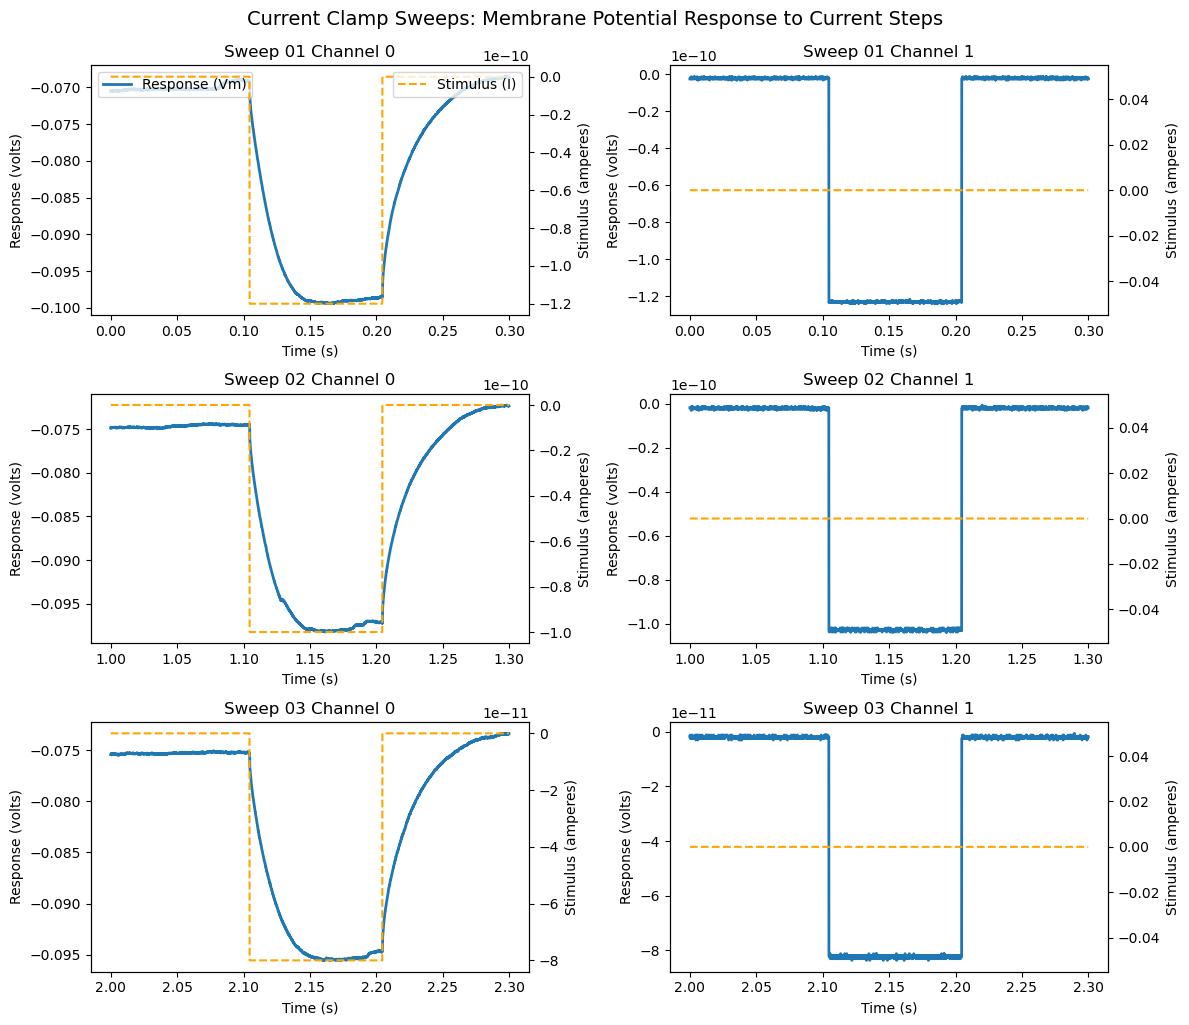

In [8]:
# Function to extract current clamp data and corresponding stimulus
def get_ccs_and_stim(n, ch):
    """Extract current clamp response and stimulus for a given sweep number and channel"""
    resp_key = f"current_clamp-response-{n:02d}-ch-{ch}"
    stim_key = f"stimulus-{n:02d}-ch-{ch}"
    resp = nwb.acquisition[resp_key]
    stim = nwb.stimulus[stim_key]
    t = np.arange(resp.data.shape[0]) / resp.rate + resp.starting_time
    return t, resp.data[:] * resp.conversion, stim.data[:] * stim.conversion, stim.unit, resp.unit

# Plot the first 3 current clamp sweeps for both channels
plt.figure(figsize=(12, 10))
for i, n in enumerate([1, 2, 3]):
    for ch in [0, 1]:
        t, resp_v, stim_i, stim_unit, resp_unit = get_ccs_and_stim(n, ch)
        ax = plt.subplot(3, 2, 2 * (n - 1) + ch + 1)
        ax.plot(t, resp_v, label='Response (Vm)', linewidth=2)
        ax2 = ax.twinx()
        ax2.plot(t, stim_i, color='orange', linestyle='--', label='Stimulus (I)', linewidth=1.5)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'Response ({resp_unit})')
        ax2.set_ylabel(f'Stimulus ({stim_unit})')
        ax.set_title(f'Sweep {n:02d} Channel {ch}')
        if n == 1 and ch == 0:
            ax.legend(loc='upper left')
            ax2.legend(loc='upper right')
plt.tight_layout()
plt.suptitle('Current Clamp Sweeps: Membrane Potential Response to Current Steps', y=1.02, fontsize=14)
plt.show()

The plots above show membrane potential responses to step current injections:

- **Blue lines**: Membrane voltage (response)
- **Orange dashed lines**: Current injection (stimulus)

For channel 0 (left column), we can observe:
- Clear voltage responses to current step injections
- Membrane potential hyperpolarization during negative current steps
- Return to baseline when stimulus ends

For channel 1 (right column), the response pattern is different, possibly due to this being a secondary recording channel.

## Examining Multiple Step Responses

Let's analyze how the neuron responds to a series of increasing current steps. This is useful for characterizing the cell's input-output relationship and intrinsic properties.

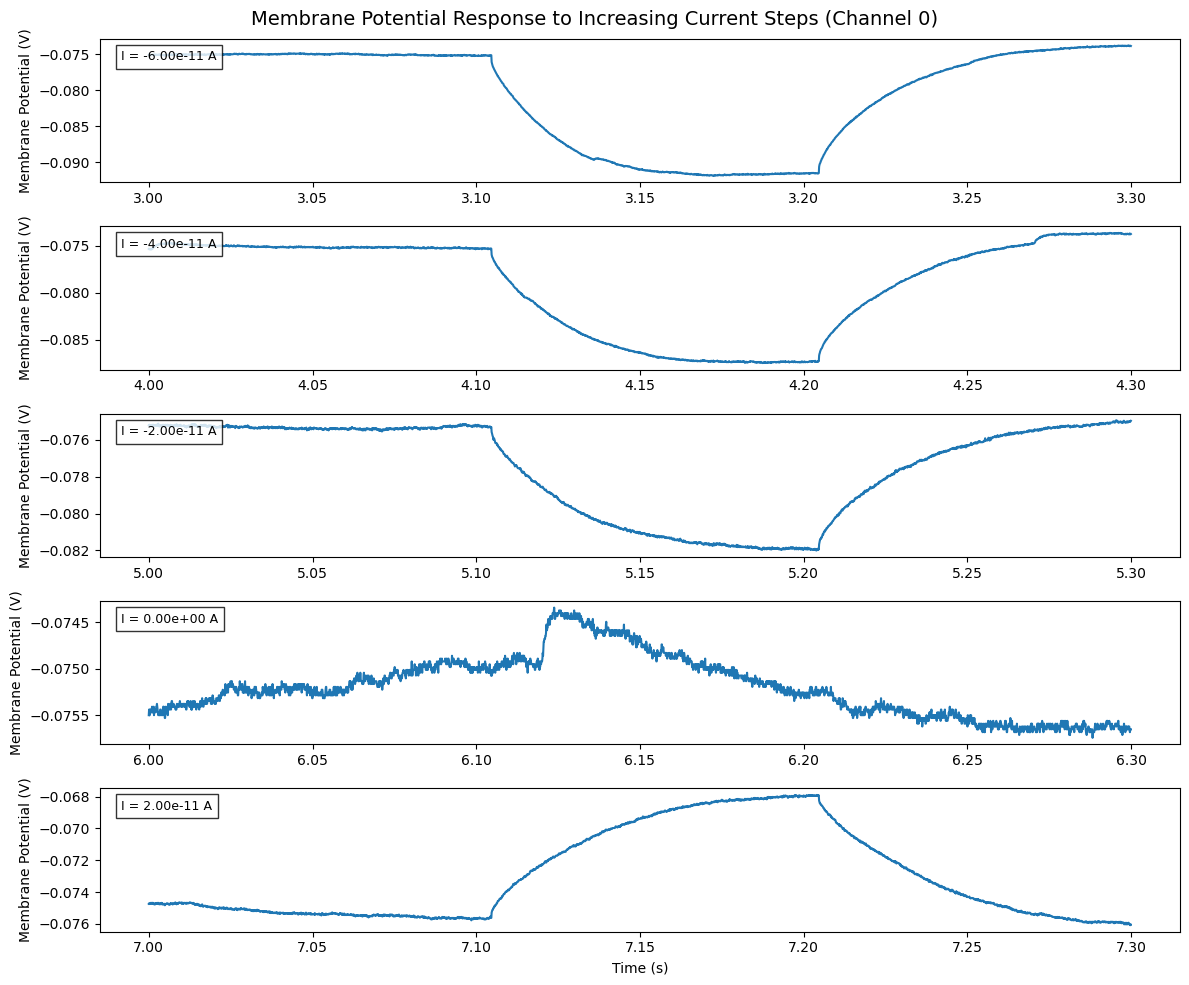

In [9]:
# Let's plot more sweeps to see the neuron's response to increasing current steps
# We'll focus on channel 0 where responses are clearer

plt.figure(figsize=(12, 10))
for i, n in enumerate(range(4, 9)):  # Sweeps 4-8
    t, resp_v, stim_i, stim_unit, resp_unit = get_ccs_and_stim(n, 0)  # Channel 0
    
    plt.subplot(5, 1, i+1)
    plt.plot(t, resp_v, label=f'Sweep {n}')
    plt.ylabel('Membrane Potential (V)')
    
    # Add stimulus intensity as text annotation
    stim_val = stim_i[int(len(stim_i)/2)]  # Value in middle of step
    plt.text(0.02, 0.85, f'I = {stim_val:.2e} A', 
             transform=plt.gca().transAxes, fontsize=9,
             bbox=dict(facecolor='white', alpha=0.8))
    
    if i == 4:  # Only add legend to bottom plot
        plt.xlabel('Time (s)')
    
plt.suptitle('Membrane Potential Response to Increasing Current Steps (Channel 0)', y=0.98, fontsize=14)
plt.tight_layout()
plt.show()

These plots illustrate how the neuron's membrane potential responds to a series of current steps. As the current intensity increases across sweeps, we can observe how the cell's voltage response changes, reflecting its intrinsic excitability properties.

## Comparing Protocols: Current Steps vs. Optical Stimulation

This dataset includes both current steps and optical (laser) stimulation protocols. Let's identify and compare responses to these different protocols.

In [10]:
# First, let's create a function to identify sweeps by type of protocol
def get_sweeps_by_protocol(sweeps_df, protocol_keyword):
    """Filter sweeps dataframe by protocol keyword in description"""
    return sweeps_df[sweeps_df['description'].str.contains(protocol_keyword)]

# Find sweeps with laser stimulation
laser_sweeps = get_sweeps_by_protocol(sweep_df, 'laser')
print(f"Number of sweeps with laser stimulation: {len(laser_sweeps)}")

# Check if we have both current step and laser protocols
if len(laser_sweeps) > 0:
    print("Example laser protocol descriptions:")
    for desc in laser_sweeps['description'].unique()[:2]:
        print(f"- {desc}")
else:
    print("No laser stimulation sweeps found in this file.")
    
# Find regular current step protocols
steps_sweeps = get_sweeps_by_protocol(sweep_df, 'steps')
print(f"\nNumber of sweeps with current steps: {len(steps_sweeps)}")

Number of sweeps with laser stimulation: 46
Example laser protocol descriptions:
- Response to: episodic stimulation, 10* 1Hz laser pulses, 5ms width, every 60s
- Response to: episodic stimulation, 8*30Hz laser pulses, 5ms width, every 30s

Number of sweeps with current steps: 40


## Data Exploration Workflow

Based on our exploration, here is a summary of how to work with this Dandiset:

In [11]:
# Example code for a batch processing workflow (as a template)
def process_multiple_files(dandiset, subject_filter=None, protocol_filter=None, max_files=5):
    """Template for processing multiple NWB files based on criteria"""
    
    # Get assets matching criteria
    assets = dandiset.get_assets_by_glob("*.nwb")
    
    results = []
    count = 0
    
    print(f"Starting processing of up to {max_files} files...")
    
    # Process each file
    for asset in assets:
        if count >= max_files:
            break
            
        # Apply filters on path name if specified
        if subject_filter and subject_filter not in asset.path:
            continue
            
        # Extract basic info without loading full file
        file_info = {
            'path': asset.path,
            'size_MB': asset.size / (1024*1024)
        }
        
        print(f"Processing file: {file_info['path']}")
        
        # The code below is a placeholder for real processing
        # In a real workflow, you would:
        # 1. Open the NWB file
        # 2. Extract the desired data
        # 3. Apply protocol filtering
        # 4. Perform analysis
        # 5. Close file
        
        results.append(file_info)
        count += 1
        
    return results

# Print example usage only - not executing to avoid unnecessary processing
print("Example usage of multi-file workflow:")
print("results = process_multiple_files(dandiset, subject_filter='sub-23', protocol_filter='laser')")

Example usage of multi-file workflow:
results = process_multiple_files(dandiset, subject_filter='sub-23', protocol_filter='laser')


## Summary

In this notebook, we explored Dandiset 001195, which contains intracellular electrophysiology recordings from dorsal raphe dopamine neurons and their projections to different brain regions in mice. The Dandiset includes:

1. **Rich Metadata**: Detailed subject, experimental, and cell information for each recording.

2. **Diverse Protocols**: Various stimulation protocols including current steps and optogenetic manipulation.

3. **Well-Organized Structure**: Each file follows a clearly defined naming pattern that makes it easy to filter and select specific recordings.

4. **Response-Stimulus Pairs**: Each recording contains paired stimulus and response data, allowing for detailed analysis of neural dynamics.

The notebook demonstrates how to:
- Access and extract metadata from NWB files
- List and categorize available protocols
- Visualize membrane potential responses to current steps
- Create a framework for batch processing of multiple files

This serves as a starting point for more in-depth analyses, such as:
- Characterizing intrinsic membrane properties
- Analyzing optogenetic response profiles
- Comparing responses across different cell types or brain regions
- Correlating electrophysiological properties with behavioral outcomes

In [12]:
# The Dandiset is now ready for your customized analyses

*Note: There is no need to close files or clean up resources at the end of the notebook when using Jupyter.*